# Import Packages

In [1]:
from packages import *
%matplotlib inline

# Read Dataset

In [2]:
train = pd.read_csv('data/Wavelet_train_data.csv')
test = pd.read_csv('data/Wavelet_test_data.csv')

In [3]:
train.shape,test.shape

((1194, 22), (299, 22))

# Train-test split

In [4]:
X_train = train.iloc[:,:-1].reset_index(drop=True)
y_train = train.iloc[:,-1].reset_index(drop=True)

X_test = test.iloc[:,:-1].reset_index(drop=True)
y_test = test.iloc[:,-1].reset_index(drop=True)

In [5]:
print('Training Class Distribution:',Counter(y_train))
print('Testing Class Distribution:',Counter(y_test))

Training Class Distribution: Counter({1: 643, 0: 551})
Testing Class Distribution: Counter({1: 161, 0: 138})


# Define Functions

In [6]:
def scores(clf):
    print("Training set score: {:.3f}".format(clf.score(X_train, y_train)))
    print("Test set score: {:.3f}".format(clf.score(X_test, y_test)))

In [7]:
def test_report(clf):
    y_pred = clf.predict(X_test)
    labels = ['Non-COVID-19','COVID-19']
    
    array = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(array, index = labels, columns = labels)
    
    plt.title("Confusion Matrix")
    s = sns.heatmap(df_cm, annot=True, cmap='copper', fmt='g')
    s.set(xlabel='Predicted Label', ylabel='True Label')
    print('*'*100)
    
    print(classification_report(y_test, y_pred, target_names = labels))

In [8]:
def roc(clf):
    disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)
    plt.title('ROC Curve')
    plt.plot([0,1],[0,1],'k--')
    plt.show()

In [9]:
params = {}
models = {}

def call(name,model,space):
    
    clf = GridSearchCV(estimator = model, 
                      param_grid = space,
                      cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42),
                       scoring = 'recall',
                      verbose= 0,
                      n_jobs = -1)
    
    clf.fit(X_train, y_train)
    print('Best training parameters:',clf.best_params_)
     
    best_estimator = clf.best_estimator_
    
    scores(best_estimator)
    print('*'*100)
    
    test_report(best_estimator)
    print('*'*100)
    
    roc(best_estimator)
    
    params[name] = clf.best_params_
    models[name] = best_estimator

# Naiive Bayes

Best training parameters: {'var_smoothing': 1.0}
Training set score: 0.640
Test set score: 0.672
****************************************************************************************************
****************************************************************************************************
              precision    recall  f1-score   support

Non-COVID-19       0.66      0.59      0.62       138
    COVID-19       0.68      0.75      0.71       161

    accuracy                           0.67       299
   macro avg       0.67      0.67      0.67       299
weighted avg       0.67      0.67      0.67       299

****************************************************************************************************


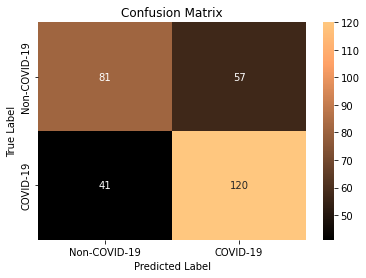

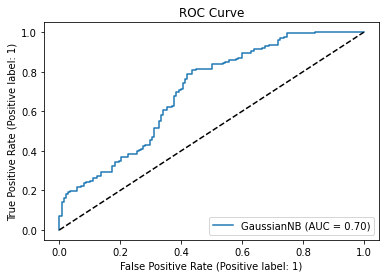

In [10]:
# Domain/Search Space
space = {'var_smoothing': np.logspace(0,-9, num=100)}

# training
model = GaussianNB()
call('NB', model, space)

# Random Forest

Best training parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}
Training set score: 0.970
Test set score: 0.786
****************************************************************************************************
****************************************************************************************************
              precision    recall  f1-score   support

Non-COVID-19       0.78      0.75      0.76       138
    COVID-19       0.79      0.82      0.80       161

    accuracy                           0.79       299
   macro avg       0.79      0.78      0.78       299
weighted avg       0.79      0.79      0.79       299

****************************************************************************************************


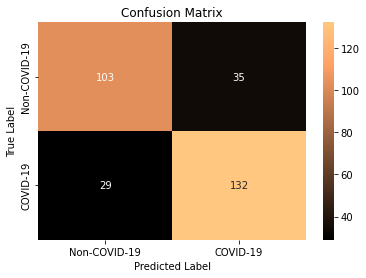

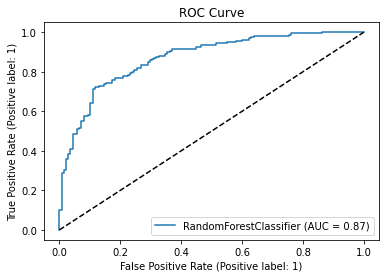

In [11]:
# Domain/Search Space
space = {'bootstrap': [True, False],
         'max_depth': [5, 7, 8, 10, None],
         'min_samples_leaf': [1, 2, 5],
         'min_samples_split': [2, 5, 10],
         'n_estimators': [10, 20 , 50, 100, 200]}

# training
model = RandomForestClassifier()
call('RF', model, space)

# Gradient Boosting

Best training parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Training set score: 1.000
Test set score: 0.823
****************************************************************************************************
****************************************************************************************************
              precision    recall  f1-score   support

Non-COVID-19       0.82      0.79      0.80       138
    COVID-19       0.83      0.85      0.84       161

    accuracy                           0.82       299
   macro avg       0.82      0.82      0.82       299
weighted avg       0.82      0.82      0.82       299

****************************************************************************************************


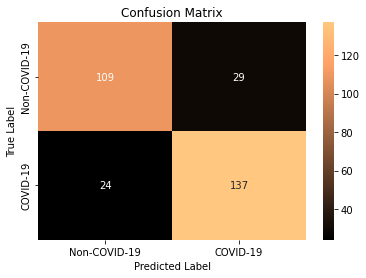

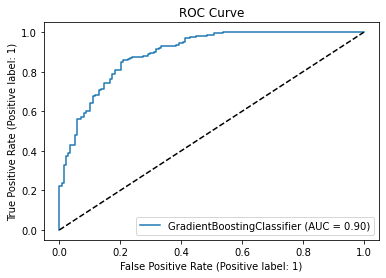

In [12]:
# Domain/Search Space
space = {'max_depth': [5, 7, 8, 10, None],
         'min_samples_leaf': [1, 2, 5],
         'min_samples_split': [2, 5, 10],
         'n_estimators': [10, 20 , 50, 100, 200]}

# training
model = GradientBoostingClassifier()
call('GB', model, space)

# Feature Scaling

In [13]:
scaler = StandardScaler()  
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test) 

# Logistic Regression

Best training parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Training set score: 0.539
Test set score: 0.542
****************************************************************************************************
****************************************************************************************************
              precision    recall  f1-score   support

Non-COVID-19       1.00      0.01      0.01       138
    COVID-19       0.54      1.00      0.70       161

    accuracy                           0.54       299
   macro avg       0.77      0.50      0.36       299
weighted avg       0.75      0.54      0.38       299

****************************************************************************************************


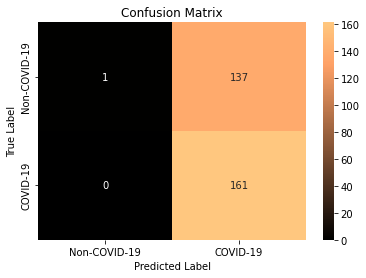

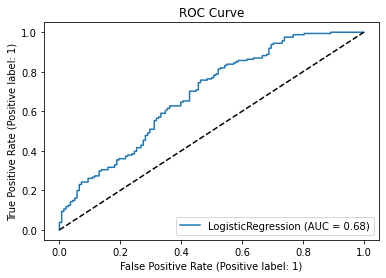

In [14]:
# Domain/Search Space
space = {'penalty' : ['l1', 'l2','elasticnet','none'], 
                 'C' : [0.01, 0.1, 1, 10, 100],
                 'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# training
model = LogisticRegression()
call('LR', model, space)

# K-NN

Best training parameters: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 5}
Training set score: 0.818
Test set score: 0.699
****************************************************************************************************
****************************************************************************************************
              precision    recall  f1-score   support

Non-COVID-19       0.67      0.69      0.68       138
    COVID-19       0.73      0.71      0.72       161

    accuracy                           0.70       299
   macro avg       0.70      0.70      0.70       299
weighted avg       0.70      0.70      0.70       299

****************************************************************************************************


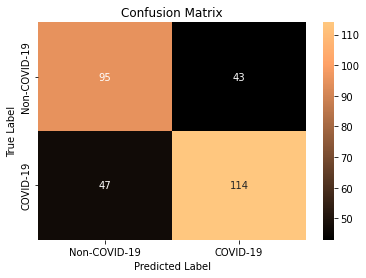

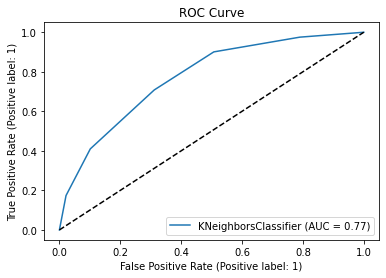

In [15]:
# Domain/Search Space
space = {'n_neighbors' : list(range(3,20,2)),
        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'metric' : ['euclidean','manhattan','chebyshev','minkowski']}

# training
model = KNeighborsClassifier()
call('KNN', model, space)

# SVM

Best training parameters: {'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}
Training set score: 0.539
Test set score: 0.538
****************************************************************************************************
****************************************************************************************************
              precision    recall  f1-score   support

Non-COVID-19       0.00      0.00      0.00       138
    COVID-19       0.54      1.00      0.70       161

    accuracy                           0.54       299
   macro avg       0.27      0.50      0.35       299
weighted avg       0.29      0.54      0.38       299

****************************************************************************************************


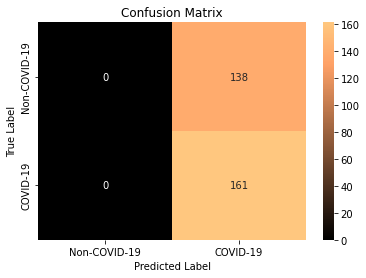

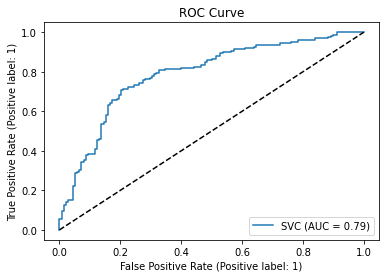

In [16]:
# Domain/Search Space
space = {'C': [0.01, 0.1, 1, 10, 100], 
 'gamma': [1, 0.1, 0.01, 0.001],
 'kernel': ['linear','rbf', 'poly', 'sigmoid']}

# training
model = SVC()
call('SVM', model, space)

In [17]:
models

{'NB': GaussianNB(var_smoothing=1.0),
 'RF': RandomForestClassifier(min_samples_leaf=5),
 'GB': GradientBoostingClassifier(max_depth=None, min_samples_leaf=2,
                            min_samples_split=5, n_estimators=200),
 'LR': LogisticRegression(C=0.01, penalty='l1', solver='saga'),
 'KNN': KNeighborsClassifier(metric='euclidean'),
 'SVM': SVC(C=0.01, gamma=1)}

In [18]:
params

{'NB': {'var_smoothing': 1.0},
 'RF': {'bootstrap': True,
  'max_depth': None,
  'min_samples_leaf': 5,
  'min_samples_split': 2,
  'n_estimators': 100},
 'GB': {'max_depth': None,
  'min_samples_leaf': 2,
  'min_samples_split': 5,
  'n_estimators': 200},
 'LR': {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'},
 'KNN': {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 5},
 'SVM': {'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}}

# Save models

In [19]:
path = 'models/Wavelet/'

In [20]:
# save models
for i in models:
    filename = i+'_Wavelet.sav'
    clf = models[i]
    pickle.dump(clf, open(path+filename, 'wb'))

In [21]:
# save Standard scaler
dump(scaler, path+'std_scaler_Wavelet.bin', compress=True)

['models/Wavelet/std_scaler_Wavelet.bin']